In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel('India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.head(10)

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
1973-06-01,7.2719
1973-07-01,7.3510
1973-08-01,7.5643
1973-09-01,7.7000


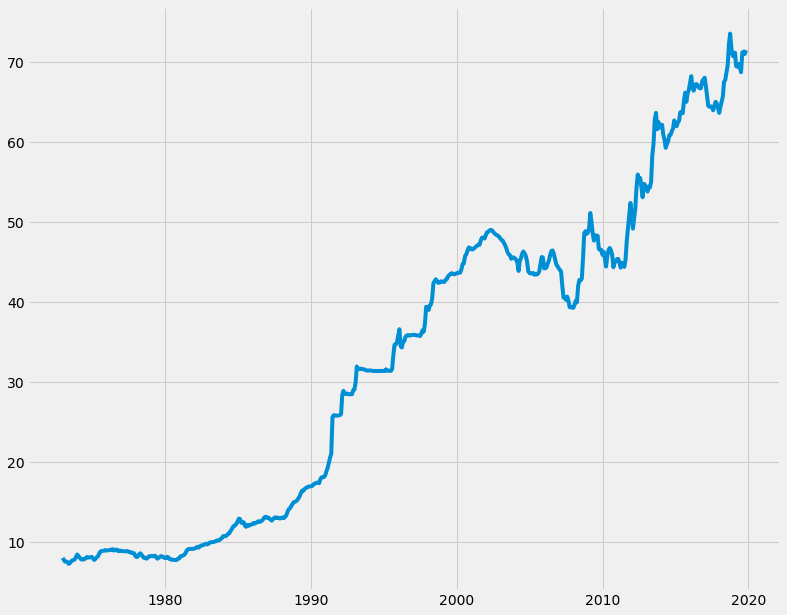

In [3]:
plt.figure(figsize=(12,10))
plt.plot(df.EXINUS)

Detecting Trend Using a Hodrick-Prescott Filter

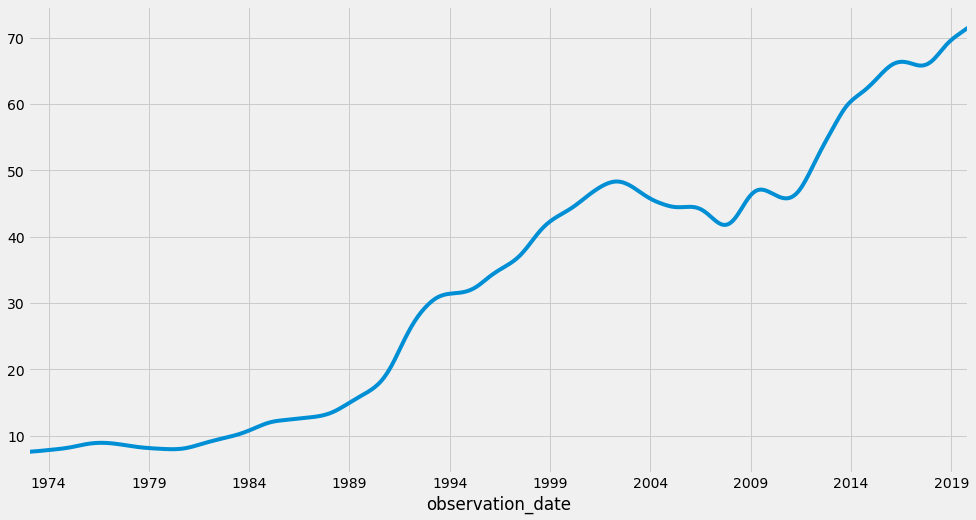

In [4]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'],lamb =1600)
EXINUS_trend.plot(figsize=(15,8)).autoscale(axis='x',tight= True)

Detrending Using Pandas Differencing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [6]:
df =pd.read_excel('India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True)

df.head(10)

In [8]:
df = df.EXINUS.diff()

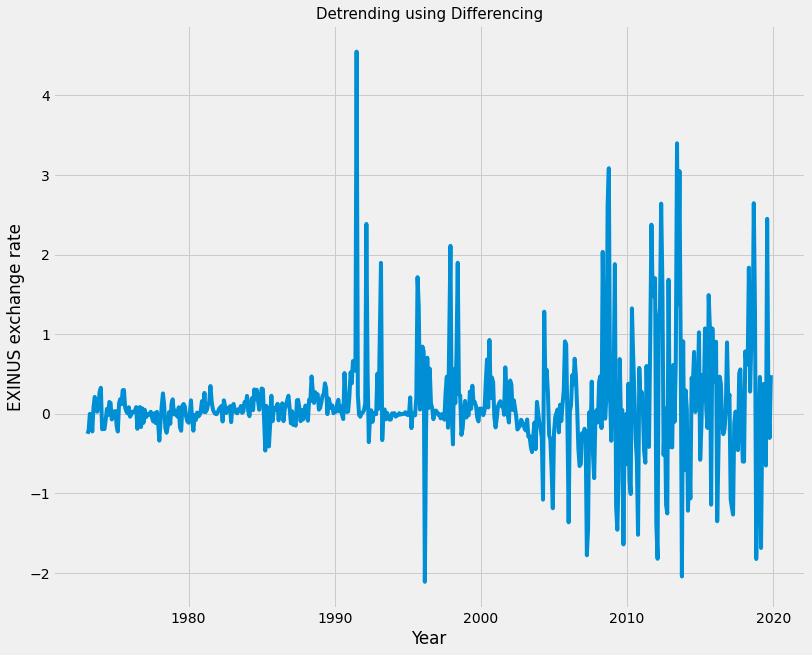

In [9]:
plt.figure(figsize=(12,10))
plt.plot(df)
plt.title('Detrending using Differencing', fontsize=15)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

Detrending Using a SciPy Signal

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

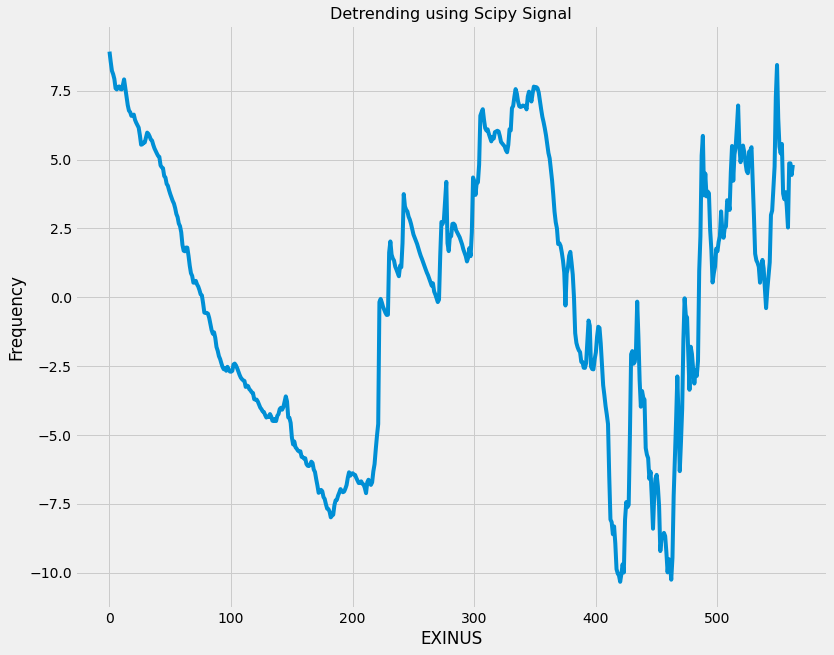

In [16]:
df = pd.read_excel('India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
detrended =signal.detrend(df.EXINUS.values)
plt.figure(figsize=(12,10))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal',fontsize=16)
plt.show()

Detrending Using HP Filter

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings('ignore')


In [18]:
df = pd.read_excel('India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)

In [19]:
df.sample(10)

,EXINUS
observation_date,
2019-08-01,71.1891
2009-03-01,51.1291
2002-07-01,48.7877
1991-01-01,18.3390
1980-06-01,7.8424
1975-01-01,8.1300
1994-07-01,31.3764
1992-01-01,25.8629
2011-09-01,47.6905


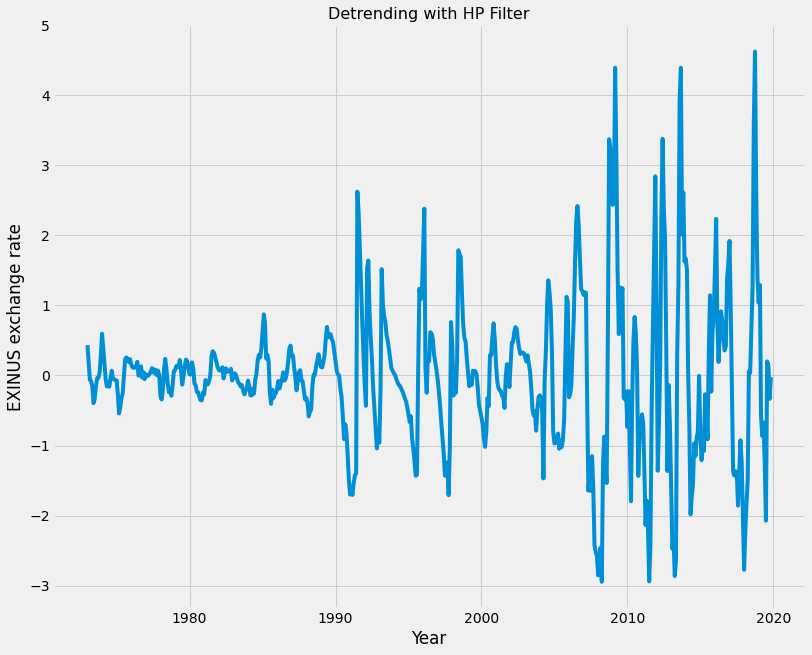

In [21]:
EXINUS_cycle,EXINUS_trend=hpfilter(df['EXINUS'],lamb=1600)
df['trend']=EXINUS_trend
detrended = df.EXINUS-df['trend']
plt.figure(figsize=(12,10))
plt.plot(detrended)
plt.title('Detrending with HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

Detecting Seasonality with 
*Multiple box plots
*Autocorrelation plots

Multiple Box Plots

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('India_Exchange_Rate_Dataset.xls',parse_dates=True)

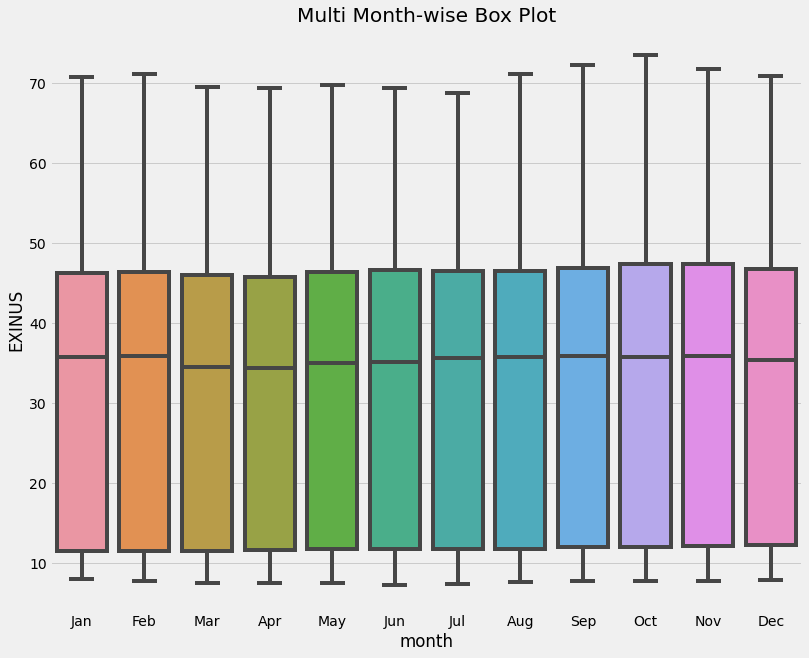

In [25]:
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month']= [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()
plt.figure(figsize=(12,10))
sns.boxplot(x='month',y='EXINUS',data=df).set_title('Multi Month-wise Box Plot')
plt.show()

Autocorrelation Plot

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

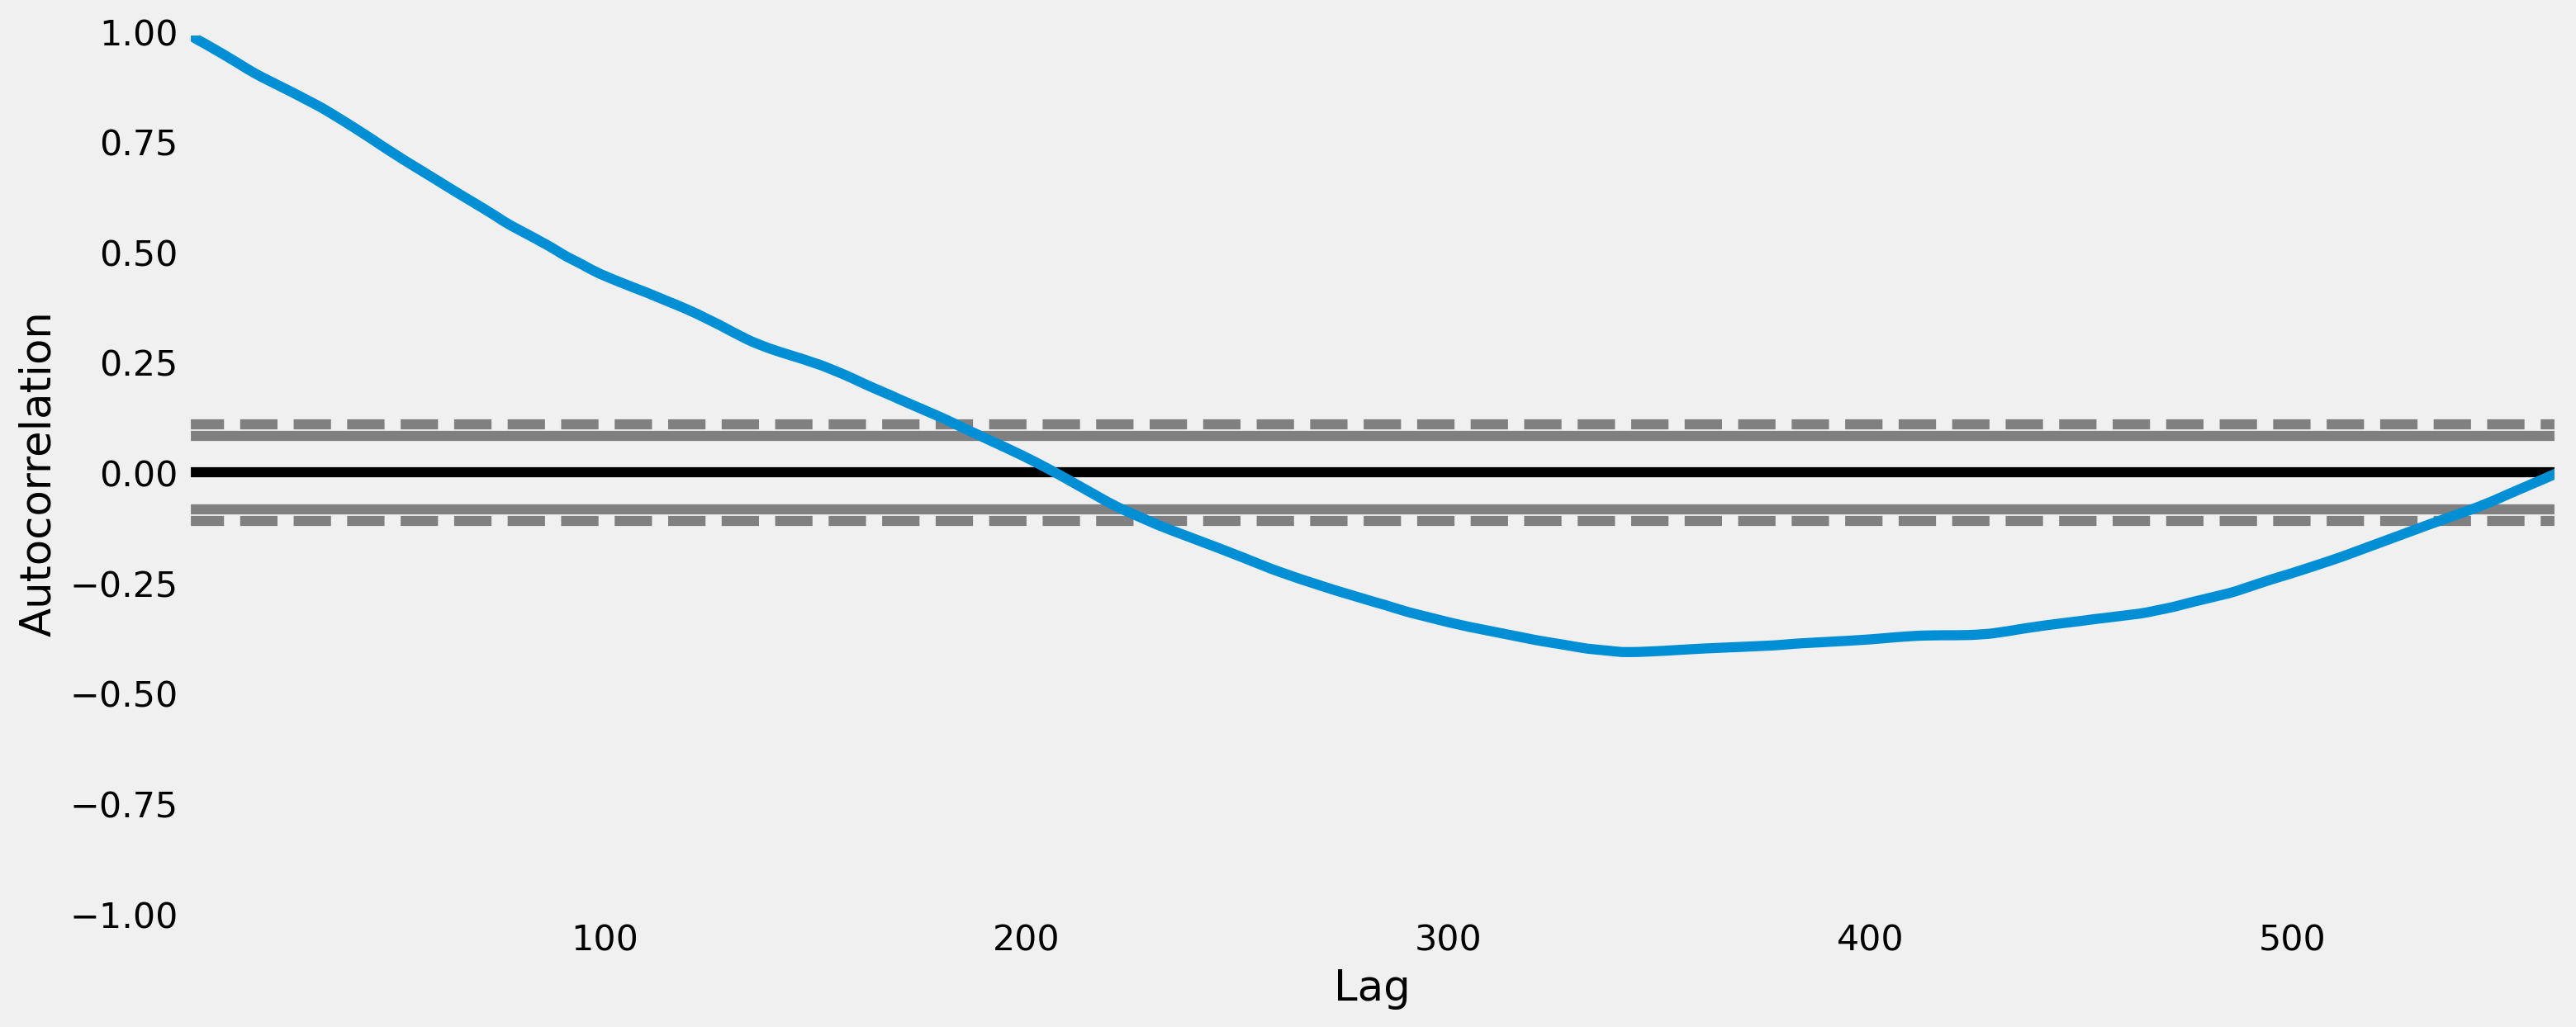

In [30]:
df= pd.read_excel('India_Exchange_Rate_Dataset.xls',parse_dates=True,index_col=0)
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':220})
autocorrelation_plot(df.EXINUS.tolist())

Decomposing Time Series into its Components

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
df = pd.read_excel('India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)

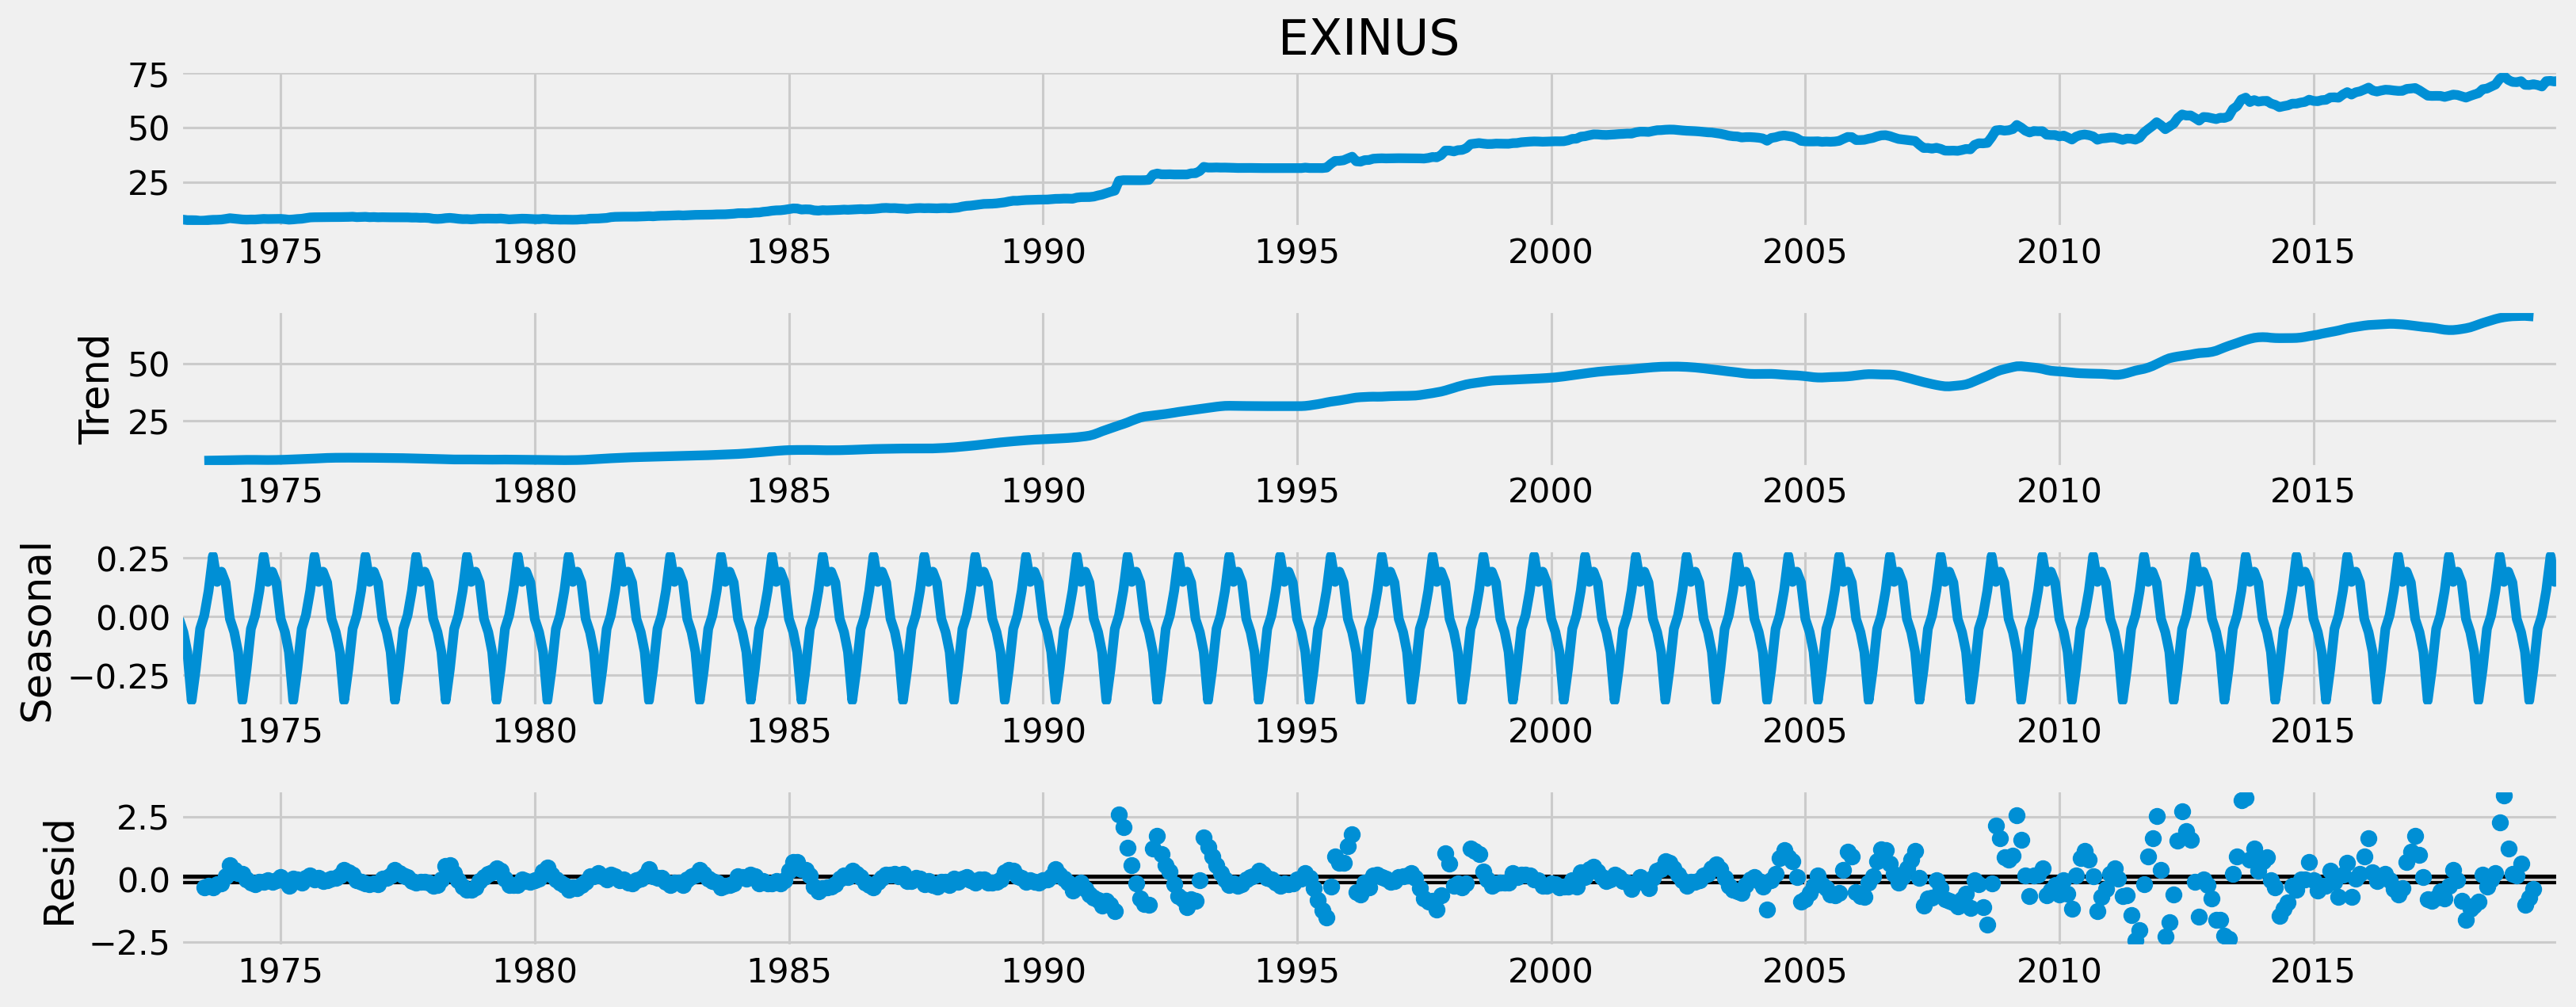

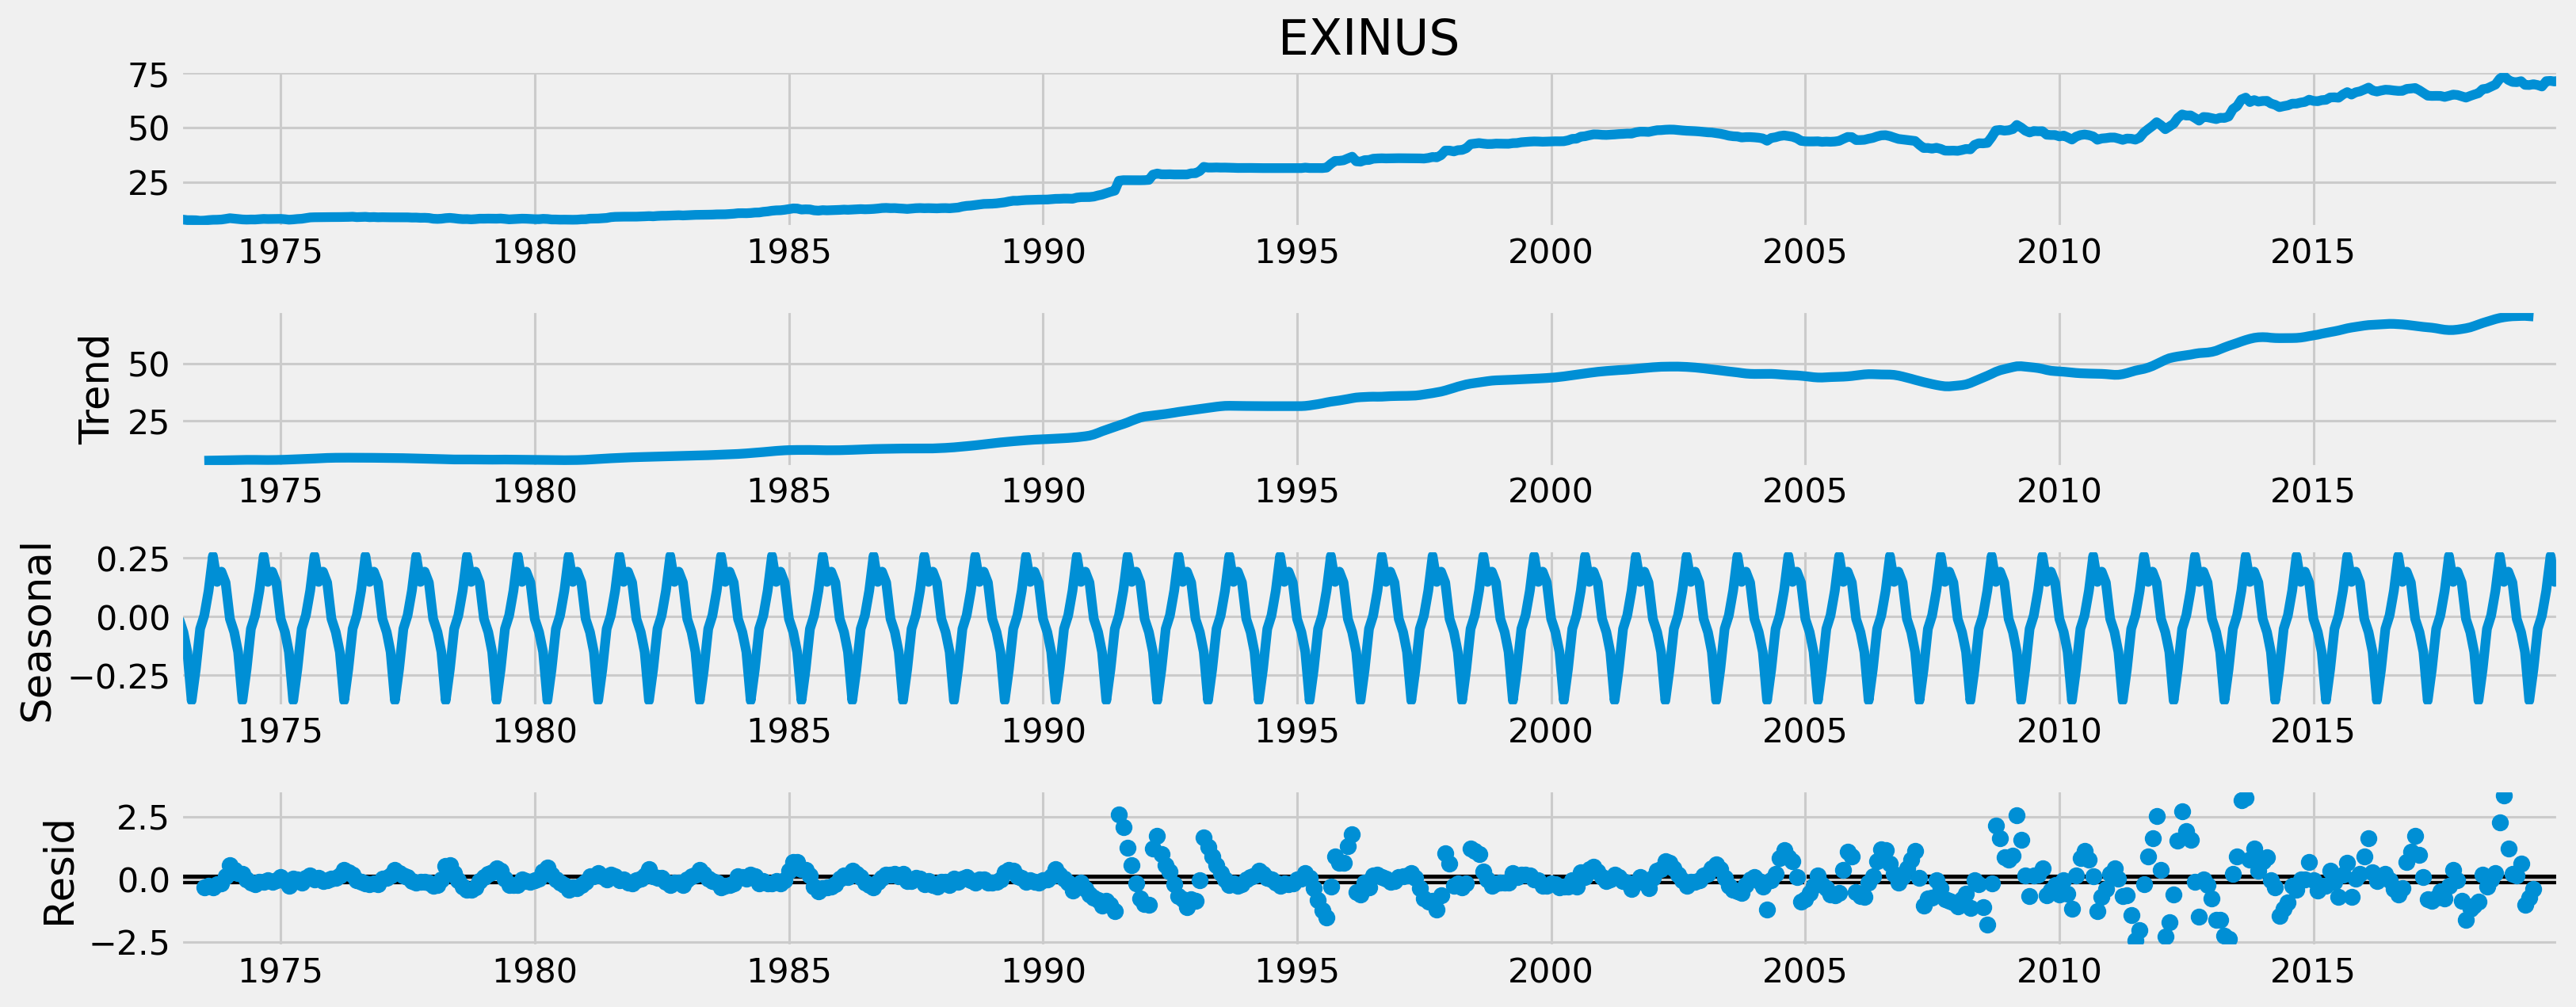

In [34]:
result= seasonal_decompose(df.EXINUS,model='add')
result.plot()

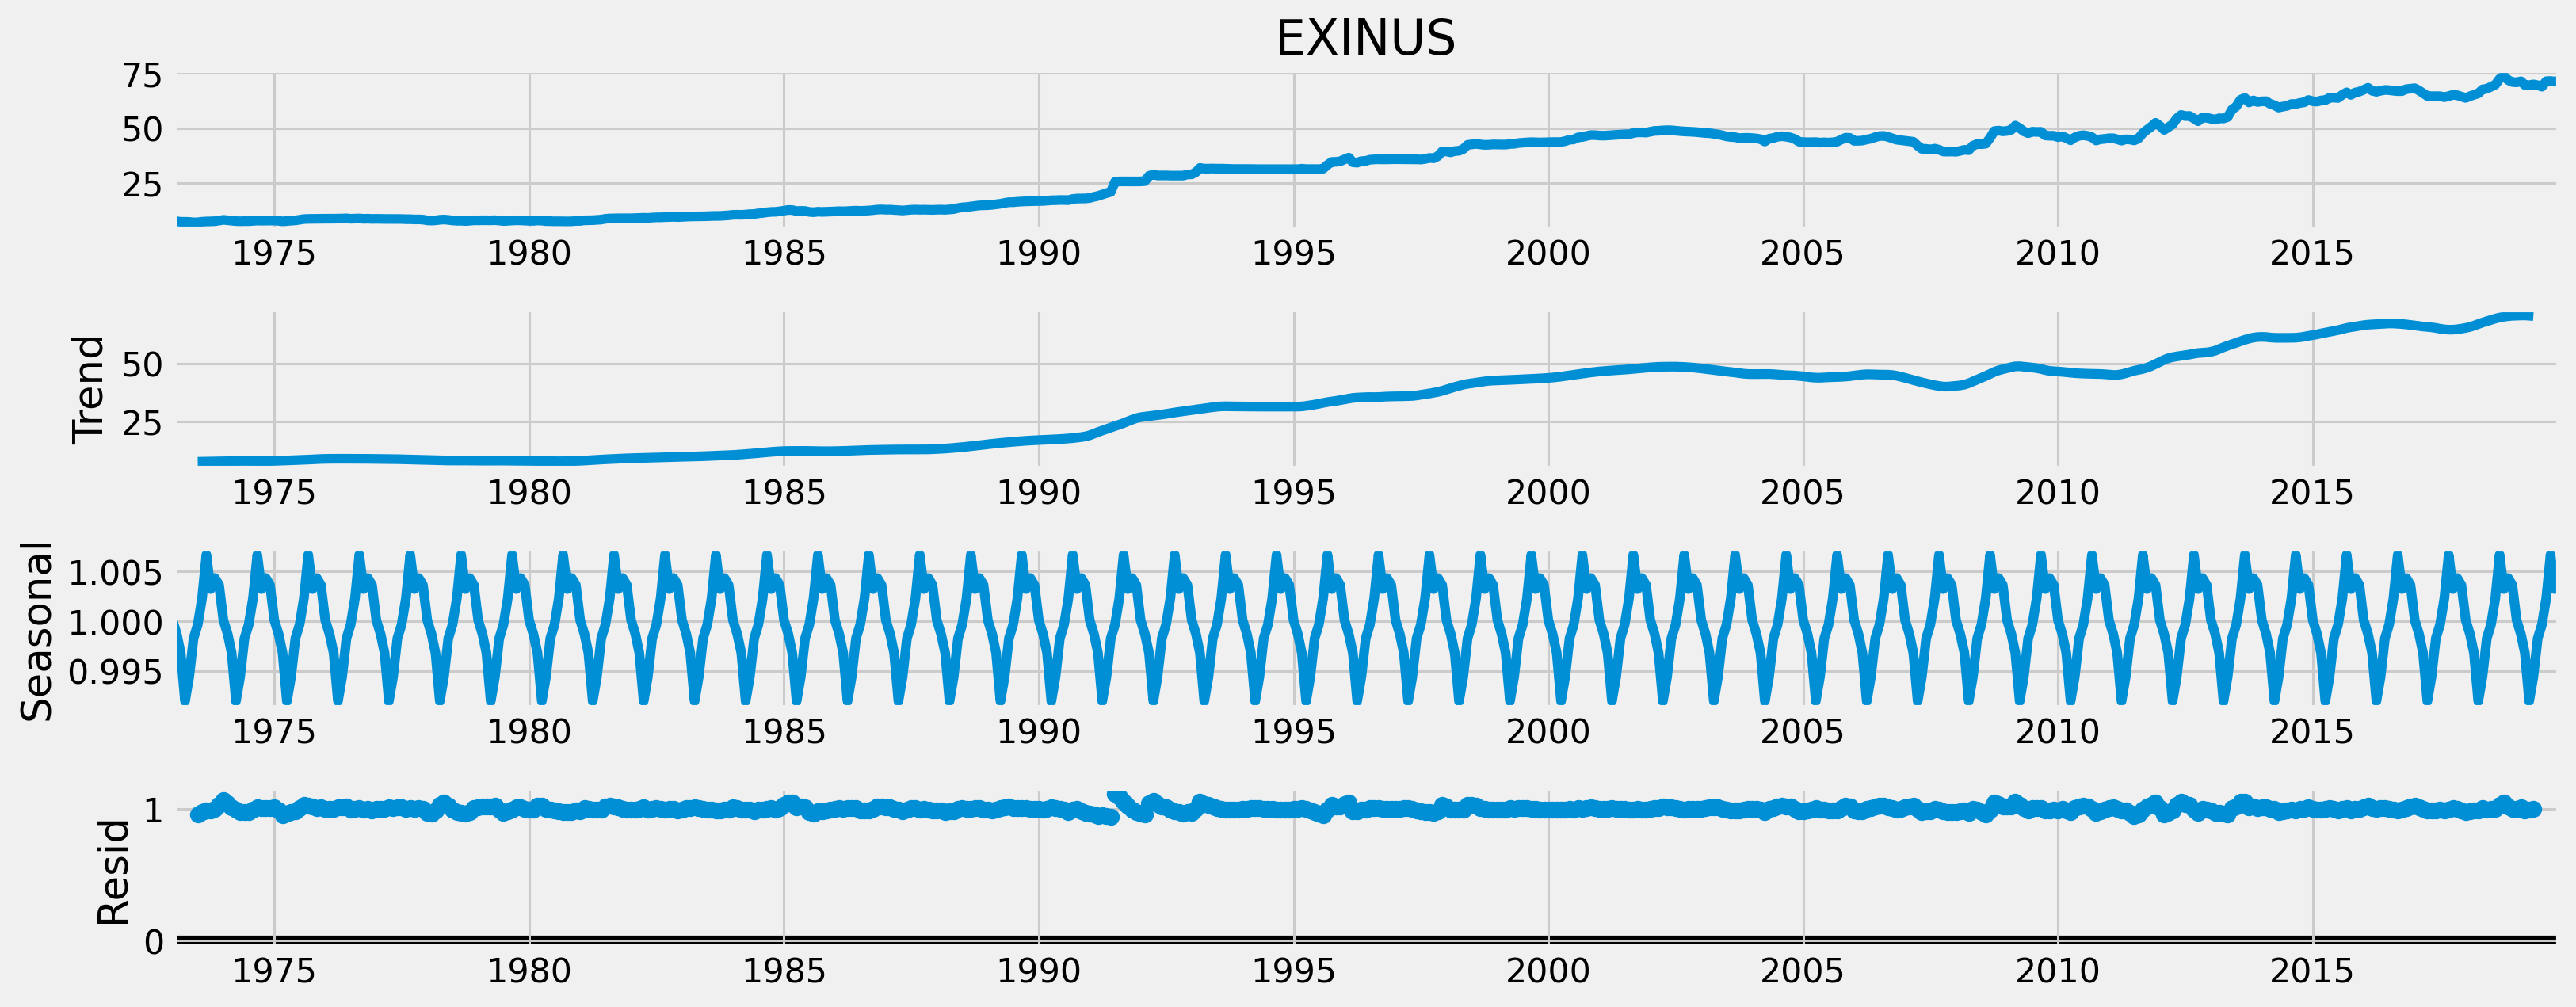

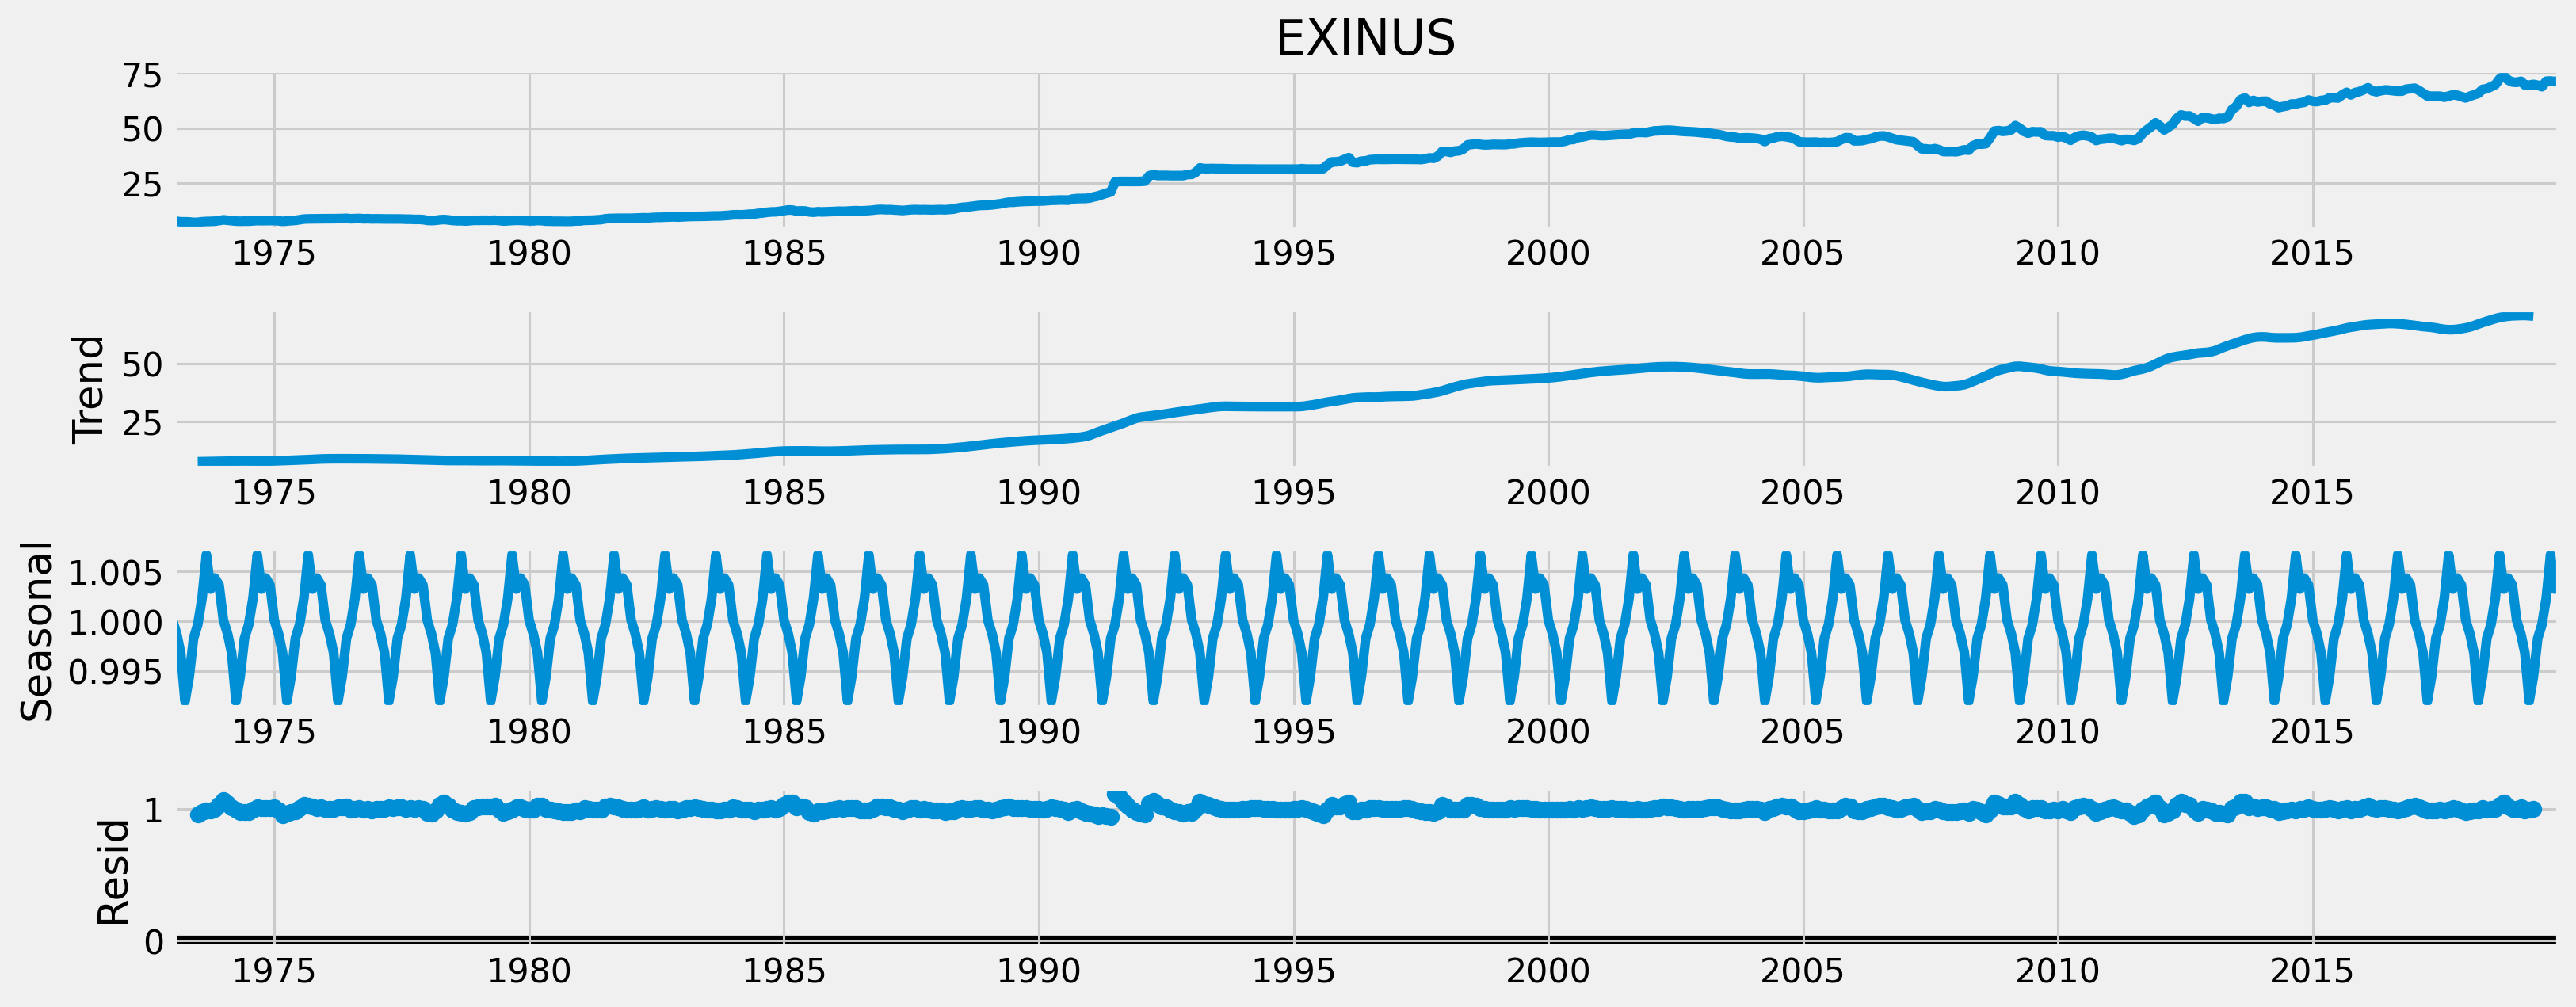

In [35]:
result= seasonal_decompose(df.EXINUS,model='mul')
result.plot()